In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/drive/My Drive/dibimbing/Final Project/Dataset'

employee_survey_data = pd.read_csv(os.path.join(folder_path, 'employee_survey_data.csv'))
general_data = pd.read_csv(os.path.join(folder_path, 'general_data.csv'))
in_time = pd.read_csv(os.path.join(folder_path, 'in_time.csv'))
manager_survey_data = pd.read_csv(os.path.join(folder_path, 'manager_survey_data.csv'))
out_time = pd.read_csv(os.path.join(folder_path, 'out_time.csv'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Understanding dan Penentuan Goals

##Data Understanding

Age – Age of the employee

Attrition – Whether the employee left in the previous year or not

BusinessTravel – How frequently the employee traveled for business purposes in the last year

Department – Department in the company

DistanceFromHome – Distance from home (in kilometers)

Education – Education level

1 = Below College

2 = College

3 = Bachelor

4 = Master

5 = Doctor

EducationField – Field of education

EmployeeCount – Employee count

EmployeeNumber – Employee number / ID

EnvironmentSatisfaction – Work environment satisfaction level

1 = Low

2 = Medium

3 = High

4 = Very High

Gender – Gender of the employee

JobInvolvement – Job involvement level

1 = Low

2 = Medium

3 = High

4 = Very High

JobLevel – Job level at the company (scale 1–5)

JobRole – Name of job role in the company

JobSatisfaction – Job satisfaction level

1 = Low

2 = Medium

3 = High

4 = Very High

MaritalStatus – Marital status of the employee

MonthlyIncome – Monthly income (in rupees per month)

NumCompaniesWorked – Total number of companies the employee has worked for

Over18 – Whether the employee is above 18 years of age or not

PercentSalaryHike – Percent salary hike for last year

PerformanceRating – Performance rating for last year

1 = Low

2 = Good

3 = Excellent

4 = Outstanding

RelationshipSatisfaction – Relationship satisfaction level

1 = Low

2 = Medium

3 = High

4 = Very High

StandardHours – Standard working hours for the employee

StockOptionLevel – Stock option level of the employee

TotalWorkingYears – Total number of years the employee has worked so far

TrainingTimesLastYear – Number of training sessions conducted for this employee in the last year

WorkLifeBalance – Work–life balance level

1 = Bad

2 = Good

3 = Better

4 = Best

YearsAtCompany – Total number of years spent at the company

YearsSinceLastPromotion – Number of years since the last promotion

YearsWithCurrManager – Number of years under the current manager

###employee_survey_data.csv

In [ ]:
employee_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [ ]:
employee_survey_data.isna()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
4405,False,False,False,False
4406,False,False,False,False
4407,False,False,False,False
4408,False,False,False,False


In [ ]:
display(employee_survey_data[employee_survey_data.isna().any(axis=1)])

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
11,12,NaN,4.0,3.0
40,41,3.0,NaN,3.0
84,85,3.0,4.0,NaN
111,112,NaN,2.0,3.0
124,125,3.0,NaN,3.0
195,196,NaN,3.0,2.0
273,274,3.0,4.0,NaN
300,301,NaN,4.0,3.0
313,314,1.0,NaN,3.0
405,406,NaN,4.0,2.0


###general_data.csv

In [ ]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
general_data.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeID,0
Gender,0


In [ ]:
display(general_data[general_data.isna().any(axis=1)])

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
23,42,No,Travel_Rarely,Research & Development,4,4,Life Sciences,1,24,Male,1,Manufacturing Director,Married,89260,1.0,Y,14,8,0,NaN,4,20,11,6
115,27,No,Travel_Rarely,Sales,2,3,Life Sciences,1,116,Male,1,Sales Executive,Divorced,23670,NaN,Y,12,8,1,5.0,2,5,0,4
137,43,No,Travel_Frequently,Sales,14,3,Life Sciences,1,138,Female,1,Manufacturing Director,Married,37480,7.0,Y,14,8,2,NaN,3,3,1,2
210,52,No,Travel_Rarely,Sales,2,1,Medical,1,211,Male,1,Laboratory Technician,Divorced,99800,NaN,Y,11,8,1,18.0,2,10,6,9
308,47,Yes,Travel_Frequently,Research & Development,4,3,Life Sciences,1,309,Male,1,Research Director,Single,27740,4.0,Y,13,8,1,NaN,2,5,1,3
343,40,No,Travel_Frequently,Sales,9,3,Marketing,1,344,Male,3,Manufacturing Director,Single,22380,NaN,Y,14,8,0,10.0,3,1,0,0
476,22,No,Travel_Rarely,Research & Development,8,3,Other,1,477,Male,2,Sales Representative,Married,49070,NaN,Y,21,8,1,4.0,2,4,1,1
574,37,No,Travel_Rarely,Research & Development,23,3,Life Sciences,1,575,Male,3,Manufacturing Director,Divorced,166590,7.0,Y,16,8,1,NaN,2,6,1,3
647,29,No,Travel_Rarely,Research & Development,3,3,Technical Degree,1,648,Female,2,Healthcare Representative,Divorced,48050,NaN,Y,16,8,1,9.0,2,7,1,7
799,29,Yes,Travel_Frequently,Research & Development,28,3,Medical,1,800,Female,5,Research Scientist,Single,44340,NaN,Y,17,8,3,7.0,1,5,0,0


###manager_survey_data.csv

In [ ]:
manager_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [ ]:
manager_survey_data.sample(10)

,EmployeeID,JobInvolvement,PerformanceRating
2445,2446,3,3
3728,3729,4,3
2324,2325,2,3
408,409,3,3
1773,1774,3,3
519,520,3,3
2143,2144,3,3
847,848,2,4
3864,3865,3,3
2746,2747,3,3


In [ ]:
manager_survey_data.describe()

,EmployeeID,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000
mean,2205.500000,2.729932,3.153741
std,1273.201673,0.711400,0.360742
min,1.000000,1.000000,3.000000
25%,1103.250000,2.000000,3.000000
50%,2205.500000,3.000000,3.000000
75%,3307.750000,3.000000,3.000000
max,4410.000000,4.000000,4.000000


###in_time.csv dan out_time.csv

In [ ]:
in_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [ ]:
out_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [ ]:
in_time.isna().sum()

,0
Unnamed: 0,0
2015-01-01,4410
2015-01-02,209
2015-01-05,206
2015-01-06,228
...,...
2015-12-25,4410
2015-12-28,234
2015-12-29,230
2015-12-30,265


In [ ]:
out_time.isna().sum()

,0
Unnamed: 0,0
2015-01-01,4410
2015-01-02,209
2015-01-05,206
2015-01-06,228
...,...
2015-12-25,4410
2015-12-28,234
2015-12-29,230
2015-12-30,265


##Goals

employee performance evaluation and employee promotion evaluation/prediction

#Data Cleaning

##employee_survey_data.csv


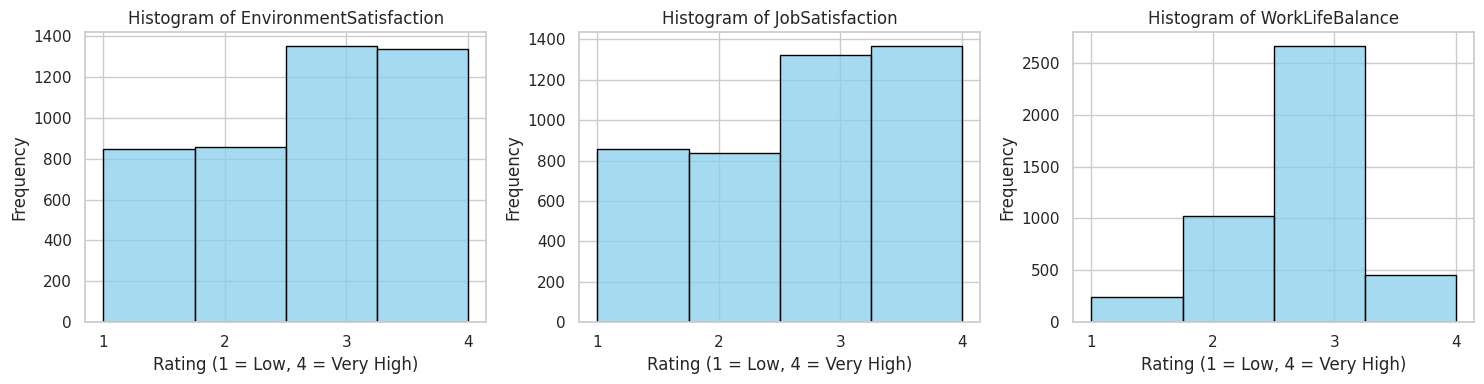

In [ ]:
cols = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']

# Set style
sns.set(style="whitegrid")

# Create histograms
plt.figure(figsize=(15, 4))
for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(employee_survey_data[col], bins=4, kde=False, color="skyblue", edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel("Rating (1 = Low, 4 = Very High)")
    plt.ylabel("Frequency")
    plt.xticks([1, 2, 3, 4])

plt.tight_layout()
plt.show()

In [ ]:
cleaned_esd = employee_survey_data.fillna(employee_survey_data.median(numeric_only=True))

In [ ]:
cleaned_esd.isna().sum()

,0
EmployeeID,0
EnvironmentSatisfaction,0
JobSatisfaction,0
WorkLifeBalance,0


###general_data.csv

untuk mengisi NaN di total worklng years, dilakukan perhitungan Estimasi Total Working Years berdasarkan tingkat pendidikan (usia umum mulai bekerja) dan masa kerja di perusahaan.

Metode ini memastikan hasil yang realistis dan konsisten, dengan mempertimbangkan pengalaman sebelum bergabung serta masa kerja aktual karyawan.

dan untuk NaN di NumCompaniesWorked, akan diasumsikan bahwa employee tersebut baru bekerja di perusahaan ini saja jadi akan diasumsikan sebagai 1.

In [ ]:
def estimate_total_work(row):
    if pd.notnull(row['TotalWorkingYears']):
        return row['TotalWorkingYears']
    edu_start = {1: 18, 2: 20, 3: 22, 4: 24, 5: 26}
    start_age = edu_start.get(row['Education'], 22)
    est_years = row['Age'] - start_age
    # Ensure total is not less than years at company
    return max(row['YearsAtCompany'], est_years)

general_data['TotalWorkingYears_Edu_Company'] = general_data.apply(estimate_total_work, axis=1)

In [ ]:
general_data['NumCompaniesWorked'] = general_data['NumCompaniesWorked'].fillna(1)

In [ ]:
general_data.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeID,0
Gender,0


In [ ]:
general_data.sample(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears_Edu_Company
3576,54,No,Travel_Rarely,Research & Development,9,4,Life Sciences,1,3577,Male,2,Sales Executive,Married,20930,3.0,Y,19,8,0,36.0,2,10,0,9,36.0
703,35,No,Travel_Frequently,Sales,1,2,Technical Degree,1,704,Male,2,Manager,Single,66460,1.0,Y,13,8,1,9.0,2,9,1,1,9.0
1766,27,No,Travel_Rarely,Research & Development,10,3,Life Sciences,1,1767,Female,1,Laboratory Technician,Single,29560,8.0,Y,13,8,0,9.0,6,7,0,7,9.0
3036,30,No,Non-Travel,Sales,25,4,Other,1,3037,Male,1,Healthcare Representative,Married,53800,7.0,Y,21,8,1,4.0,0,2,2,2,4.0
2408,41,No,Travel_Rarely,Research & Development,24,4,Life Sciences,1,2409,Female,4,Manager,Single,137260,3.0,Y,12,8,0,21.0,6,2,0,2,21.0
3268,24,No,Non-Travel,Sales,1,5,Marketing,1,3269,Female,1,Manufacturing Director,Divorced,81890,1.0,Y,14,8,1,1.0,3,1,0,0,1.0
2889,36,No,Travel_Frequently,Research & Development,1,3,Life Sciences,1,2890,Female,2,Laboratory Technician,Single,23050,1.0,Y,17,8,0,8.0,3,8,1,7,8.0
335,36,No,Travel_Rarely,Sales,6,3,Medical,1,336,Female,2,Sales Executive,Married,42000,0.0,Y,22,8,0,10.0,3,9,0,5,10.0
2364,21,No,Travel_Rarely,Research & Development,3,1,Life Sciences,1,2365,Female,1,Laboratory Technician,Single,170990,1.0,Y,14,8,1,3.0,2,2,2,2,3.0
2201,37,No,Travel_Rarely,Research & Development,2,2,Medical,1,2202,Female,1,Healthcare Representative,Married,54050,7.0,Y,15,8,0,8.0,3,6,1,3,8.0


###manager_survey_data.csv

In [ ]:
manager_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


karena tidak ada null dan type sudah sesuai maka data sudah clean.

###in_time.csv dan out_time.csv

mengganti tipe data menjadi date dan time

mengganti kolom unnamed:0 menjadi EmployeeID

In [ ]:
for col in in_time.columns[1:]:
    in_time[col] = pd.to_datetime(in_time[col], errors='coerce')
for col in out_time.columns[1:]:
    out_time[col] = pd.to_datetime(out_time[col], errors='coerce')

In [ ]:
in_time.rename(columns={'Unnamed: 0': 'EmployeeID'}, inplace=True)
out_time.rename(columns={'Unnamed: 0': 'EmployeeID'}, inplace=True)

In [ ]:
in_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, EmployeeID to 2015-12-31
dtypes: datetime64[ns](261), int64(1)
memory usage: 8.8 MB


In [ ]:
in_time.head()

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaT,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaT,2015-01-15 10:01:24,2015-01-16 10:19:08,NaT,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaT,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaT,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaT,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaT,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaT,2015-03-27 09:47:30,2

#Data Manipulation

akan menggabungkan dataset menjadi final_HR dan membuat AvgWorkingHours, OvertimeFlag, dan absent

In [ ]:
def get_attendance_summary(in_time: pd.DataFrame,
                           out_time: pd.DataFrame,
                           overtime_threshold: float = 9.0,
                           id_col: str = 'EmployeeID') -> pd.DataFrame:

    # Identifikasi company holidays: tanggal dimana semua NaT
    date_cols = in_time.columns[1:]
    holidays_mask = (in_time.iloc[:, 1:].isna().all(axis=0)) & (out_time.iloc[:, 1:].isna().all(axis=0))
    holidays = date_cols[holidays_mask]

    # keep valid workdays
    valid_dates = []
    for c in date_cols:
        d = pd.to_datetime(c, errors='coerce')
        if pd.isna(d):
            continue
        if d.weekday() < 5 and (c not in holidays):   # 0=Mon ... 4=Fri
            valid_dates.append(c)

    # menghitung waktu kerja valid workdays
    wh = (out_time[valid_dates] - in_time[valid_dates]).applymap(
        lambda x: x.total_seconds()/3600 if pd.notnull(x) else None
    )

    # Build summary
    summary = pd.DataFrame({
        id_col: in_time[id_col],
        'AvgWorkingHours': wh.mean(axis=1, skipna=True),
        'AbsentDays': wh.isna().sum(axis=1)  # count NaNs on valid workdays
    })

    # Overtime flag
    summary['OvertimeFlag'] = (summary['AvgWorkingHours'] > overtime_threshold).astype(int)

    # return the list of excluded holidays for log
    summary.attrs['holidays'] = list(holidays)
    summary.attrs['valid_workdays_count'] = len(valid_dates)

    return summary

In [ ]:
attendance_summary = get_attendance_summary(in_time, out_time, overtime_threshold=9.0)

print("Valid workdays:", attendance_summary.attrs['valid_workdays_count'])
print("Detected holidays:", len(attendance_summary.attrs['holidays']))
attendance_summary.head()


/tmp/ipython-input-757524324.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  wh = (out_time[valid_dates] - in_time[valid_dates]).applymap(


Valid workdays: 249
Detected holidays: 12


,EmployeeID,AvgWorkingHours,AbsentDays,OvertimeFlag
0,1,7.373651,17,0
1,2,7.718969,13,0
2,3,7.013240,7,0
3,4,7.193678,14,0
4,5,8.006175,4,0


In [ ]:
hr_master = (
    general_data
    .merge(cleaned_esd, on='EmployeeID', how='left')
    .merge(manager_survey_data, on='EmployeeID', how='left')
)

In [ ]:
hr_master.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears_Edu_Company,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,1.0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,6.0,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,5.0,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,13.0,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,9.0,4.0,1.0,3.0,3,3
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,4,Research Director,Married,40710,3.0,Y,13,8,0,28.0,5,7,7,7,28.0,3.0,2.0,2.0,3,3
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,2,Sales Executive,Single,58130,2.0,Y,20,8,1,5.0,2,0,0,0,5.0,1.0,3.0,1.0,3,4
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,2,Sales Executive,Married,31430,2.0,Y,22,8,3,10.0,2,0,0,0,10.0,1.0,2.0,3.0,3,4
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,3,Laboratory Technician,Married,20440,0.0,Y,21,8,0,10.0,2,9,7,8,10.0,2.0,4.0,3.0,3,4
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,4,Laboratory Technician,Divorced,134640,1.0,Y,13,8,1,6.0,2,6,1,5,6.0,2.0,1.0,3.0,3,3


In [ ]:
hr_final = hr_master.merge(attendance_summary, on='EmployeeID', how='left')

In [ ]:
hr_final.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears_Edu_Company,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,AvgWorkingHours,AbsentDays,OvertimeFlag
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,1.0,3.0,4.0,2.0,3,3,7.373651,17,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,6.0,3.0,2.0,4.0,2,4,7.718969,13,0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,5.0,2.0,2.0,1.0,3,3,7.013240,7,0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,13.0,4.0,4.0,3.0,2,3,7.193678,14,0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,9.0,4.0,1.0,3.0,3,3,8.006175,4,0
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,4,Research Director,Married,40710,3.0,Y,13,8,0,28.0,5,7,7,7,28.0,3.0,2.0,2.0,3,3,10.796096,12,1
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,2,Sales Executive,Single,58130,2.0,Y,20,8,1,5.0,2,0,0,0,5.0,1.0,3.0,1.0,3,4,6.923570,17,0
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,2,Sales Executive,Married,31430,2.0,Y,22,8,3,10.0,2,0,0,0,10.0,1.0,2.0,3.0,3,4,6.725621,6,0
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,3,Laboratory Technician,Married,20440,0.0,Y,21,8,0,10.0,2,9,7,8,10.0,2.0,4.0,3.0,3,4,7.236499,19,0
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,4,Laboratory Technician,Divorced,134640,1.0,Y,13,8,1,6.0,2,6,1,5,6.0,2.0,1.0,3.0,3,3,7.080088,15,0


#EDA

/tmp/ipython-input-2865320550.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hr_final[col], shade=True)


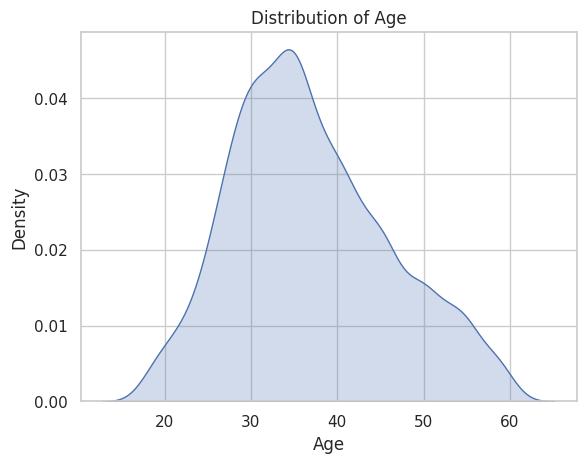

/tmp/ipython-input-2865320550.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hr_final[col], shade=True)


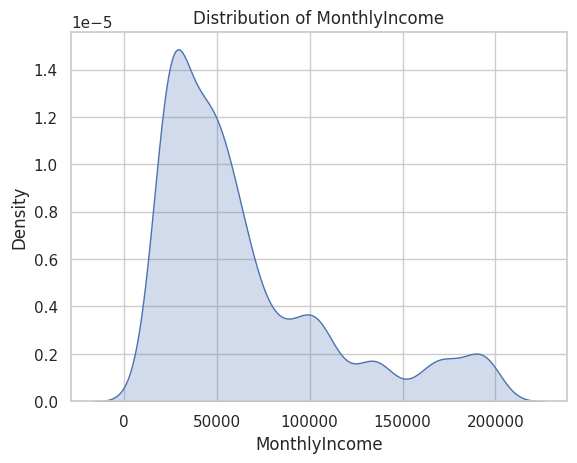

/tmp/ipython-input-2865320550.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hr_final[col], shade=True)


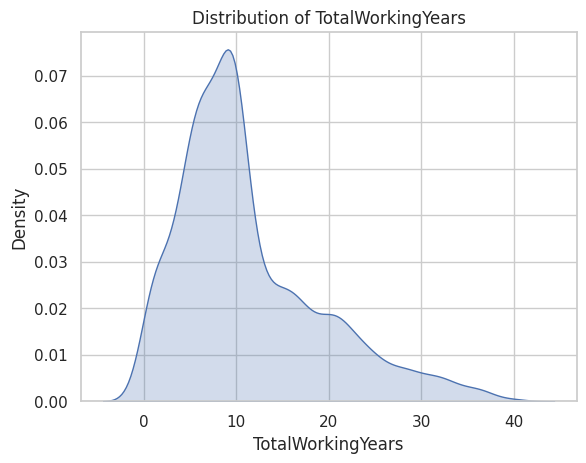

/tmp/ipython-input-2865320550.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hr_final[col], shade=True)


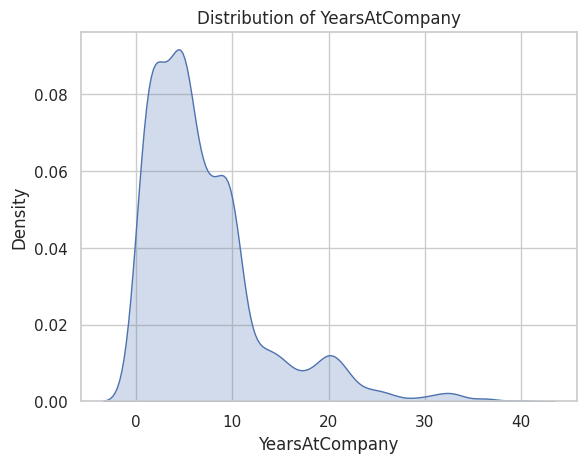

/tmp/ipython-input-2865320550.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hr_final[col], shade=True)


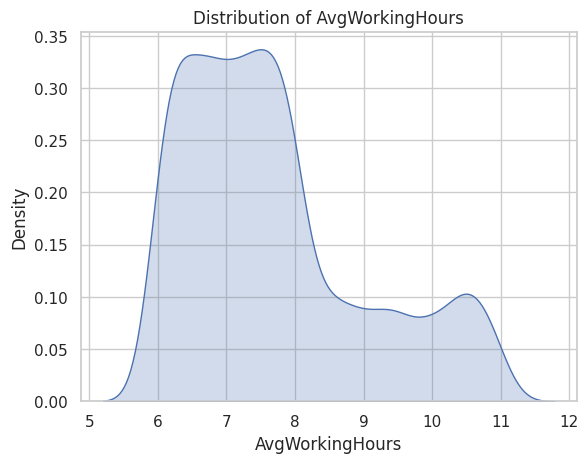

In [ ]:
num_cols = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'AvgWorkingHours']
for col in num_cols:
    sns.kdeplot(hr_final[col], shade=True)
    plt.title(f'Distribution of {col}')
    plt.show()

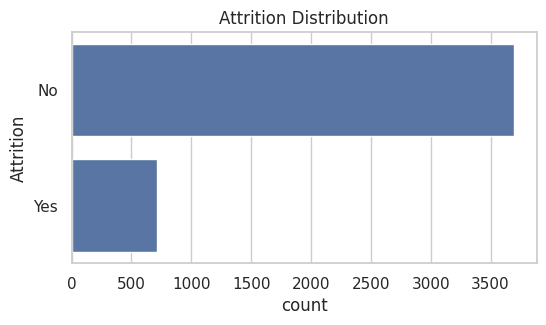

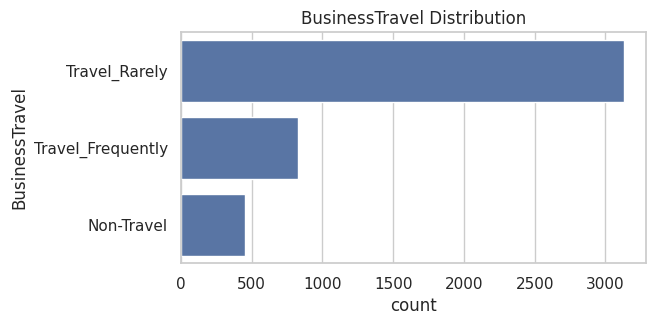

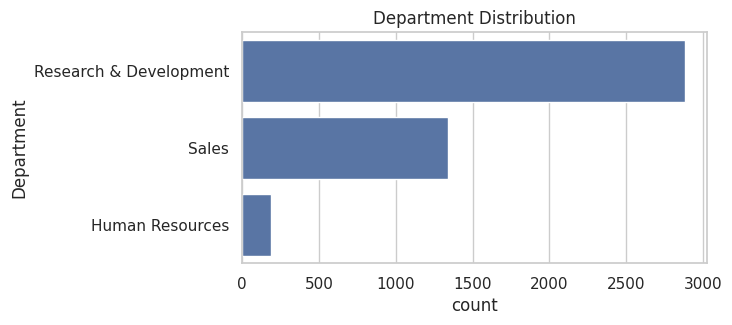

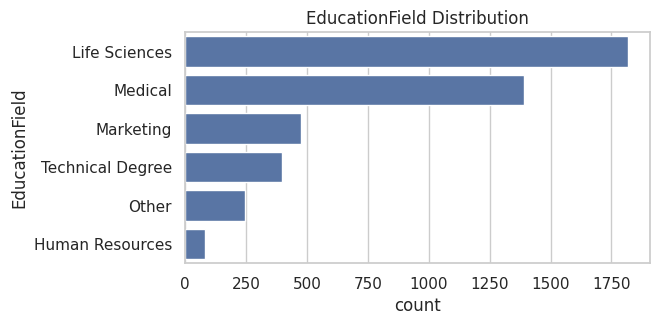

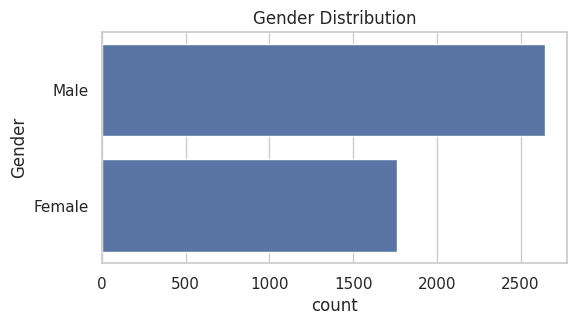

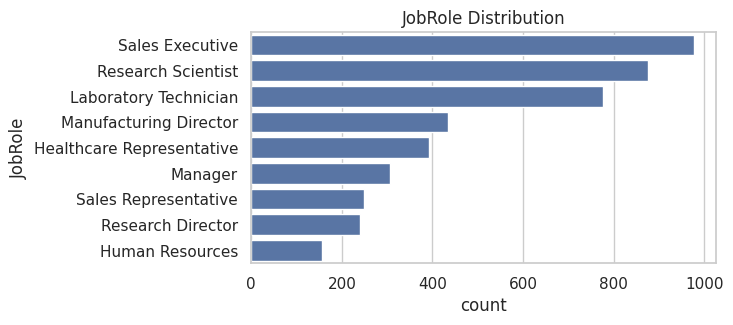

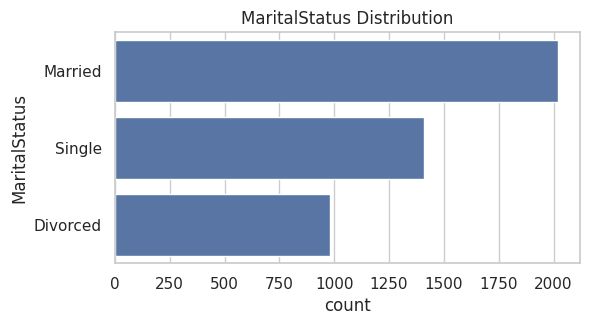

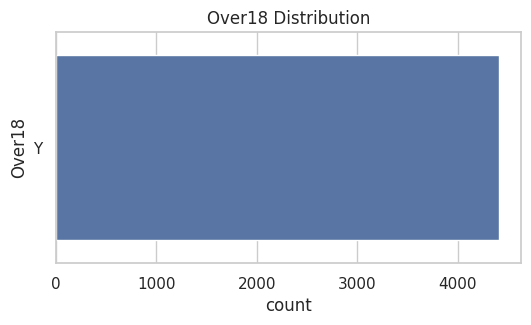

In [ ]:
cat_cols = hr_final.select_dtypes('object').columns

for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(y=col, data=hr_final, order=hr_final[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.show()



<Axes: xlabel='PerformanceRating', ylabel='MonthlyIncome'>

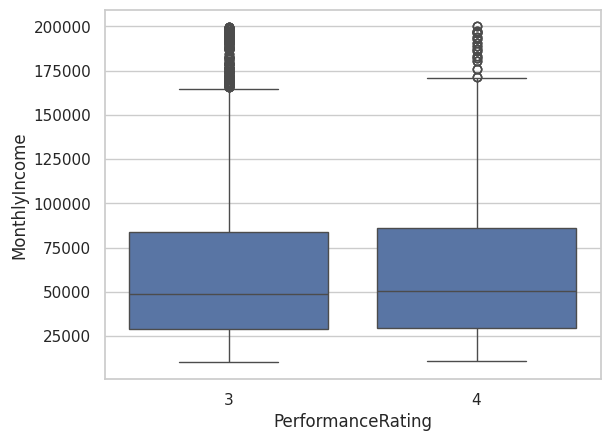

In [ ]:
sns.boxplot(x='PerformanceRating', y='MonthlyIncome', data=hr_final)

<Axes: xlabel='PerformanceRating', ylabel='YearsAtCompany'>

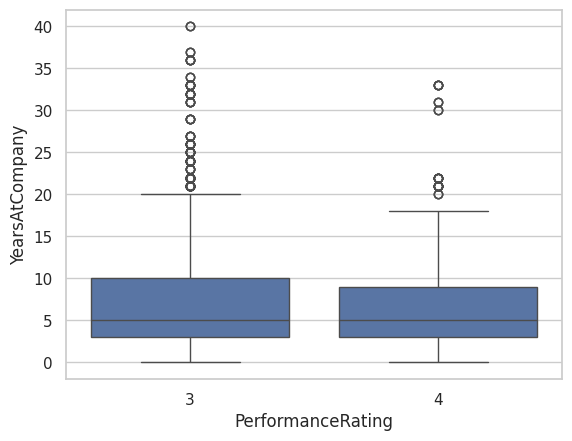

In [ ]:
sns.boxplot(x='PerformanceRating', y='YearsAtCompany', data=hr_final)

In [ ]:
hr_final['PerformanceRating'].describe()

,PerformanceRating
count,4410.000000
mean,3.153741
std,0.360742
min,3.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,4.000000


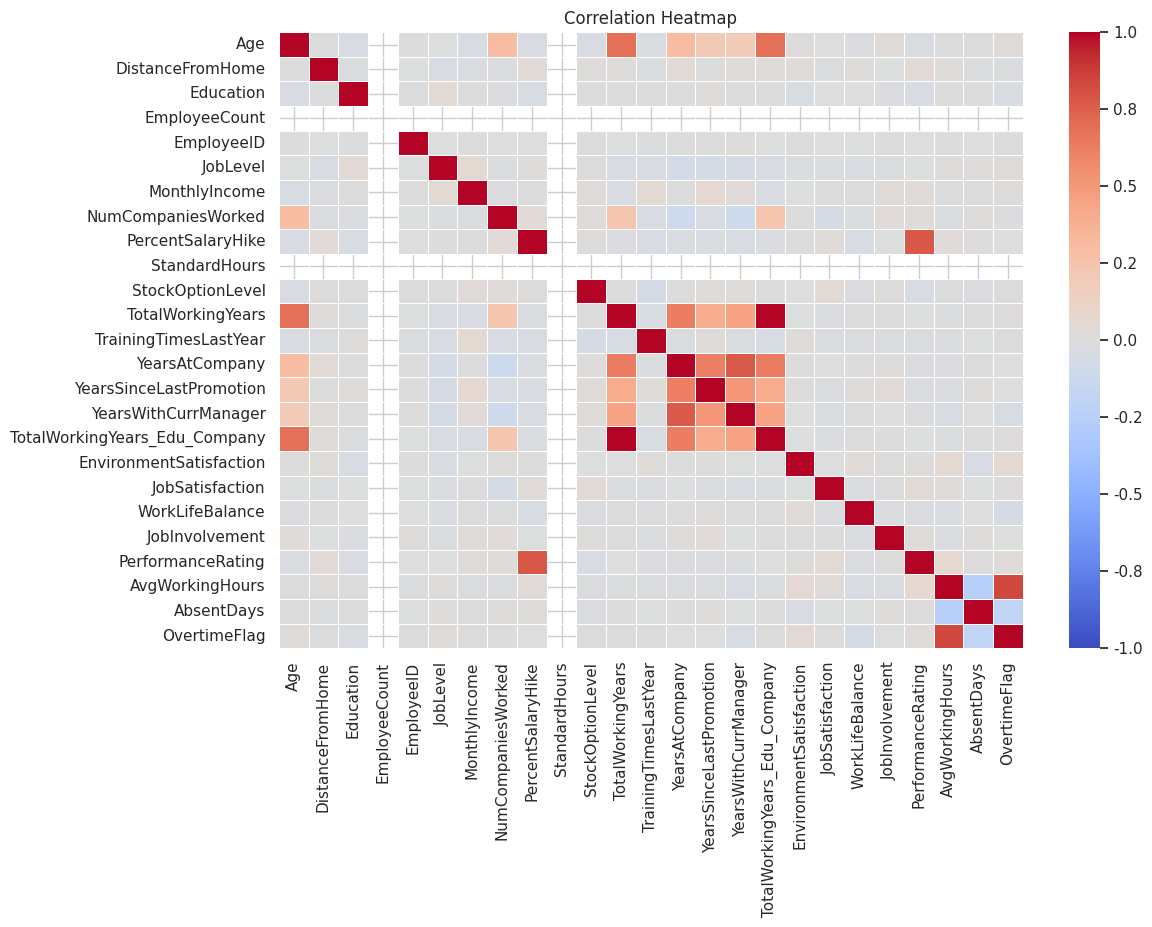

In [ ]:
corr = hr_final.select_dtypes('number').corr()
plt.figure(figsize=(12,8))
ax = sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".1f", vmin = -1, vmax= 1, linewidths=0.5, cbar_kws={'format': '%.1f'} )
plt.title('Correlation Heatmap')

plt.savefig("heatmap.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()

In [ ]:
output_path = os.path.join(folder_path, 'hr_final.csv')

hr_final.to_csv(output_path, index=False)

print(f"'{output_path}' saved successfully.")

'/content/drive/My Drive/dibimbing/Final Project/Dataset/hr_final.csv' saved successfully.


Membuat RFM table

In [ ]:
import os
# Membuat Segmentasi Kinerja & Promosi Karyawan menggunakan metode RFM (Recency, Frequency, Monetary)

# === 1. Pastikan semua kolom yang dibutuhkan ada ===
required_cols = [
    "YearsSinceLastPromotion", "PerformanceRating", "JobInvolvement",
    "PercentSalaryHike", "JobSatisfaction", "MonthlyIncome",
    "TotalWorkingYears", "EmployeeID", "Department"
]
for c in required_cols:
    if c not in hr_final.columns:
        hr_final[c] = np.nan

# === 2. Normalisasi min–max yang stabil (robust) ===
def minmax(s):
    s = s.astype(float)
    mn, mx = s.min(skipna=True), s.max(skipna=True)
    if pd.isna(mn) or pd.isna(mx) or mn == mx:
        return pd.Series(np.zeros(len(s)), index=s.index)
    return (s - mn) / (mx - mn)

# === 3. Perhitungan base value ===
# R (Recency): Kebalikan dari tahun sejak promosi terakhir
hr_final["R_Value"] = 1.0 / (hr_final["YearsSinceLastPromotion"].fillna(999) + 1.0)

# F (Frequency/Performance): Gabungan beberapa indikator kinerja yang dinormalisasi
Perf_norm = minmax(hr_final["PerformanceRating"].fillna(0))
Involv_norm = minmax(hr_final["JobInvolvement"].fillna(0))
Hike_norm  = minmax(hr_final["PercentSalaryHike"].fillna(0))
Sat_norm   = minmax(hr_final["JobSatisfaction"].fillna(0))

hr_final["F_Value"] = (
    0.50 * Perf_norm +     # Bobot utama pada penilaian kinerja
    0.20 * Involv_norm +   # Keterlibatan kerja
    0.15 * Hike_norm +     # Persentase kenaikan gaji
    0.15 * Sat_norm        # Kepuasan kerja
)

# M (Monetary/Value): Nilai finansial dari kontribusi, diwakili oleh penghasilan bulanan
# Jika kosong, gunakan total tahun pengalaman sebagai pengganti
M_raw = hr_final["MonthlyIncome"]
M_value = M_raw.where(~M_raw.isna(), hr_final["TotalWorkingYears"].fillna(0))
hr_final["M_Value"] = minmax(M_value)

# === 4. Fungsi bantu: Mengubah nilai menjadi skor 1–5 (berdasarkan kuintil) ===
def to_quintile_score(series, higher_is_better=True):
    s = series.astype(float).fillna(series.astype(float).median(skipna=True))
    jitter = (np.arange(len(s)) % 997) * 1e-9  # mencegah nilai sama persis (ties)
    s = s + jitter
    if not higher_is_better:
        s = -s
    ranks = s.rank(method="average", pct=True)
    scores = np.ceil(ranks * 5).astype(int)
    return scores.clip(1, 5)

# Skor global (seluruh perusahaan)
hr_final["R_Score"] = to_quintile_score(hr_final["R_Value"], higher_is_better=True)
hr_final["F_Score"] = to_quintile_score(hr_final["F_Value"], higher_is_better=True)
hr_final["M_Score"] = to_quintile_score(hr_final["M_Value"], higher_is_better=True)

# === 5. Skor berdasarkan kelompok departemen (opsional) ===
def cohort_scores(values, group, higher_is_better=True):
    return values.groupby(group.fillna("Unknown"), group_keys=False).apply(
        lambda g: to_quintile_score(g, higher_is_better)
    )

hr_final["R_Score_Department"] = cohort_scores(hr_final["R_Value"], hr_final["Department"], True)
hr_final["F_Score_Department"] = cohort_scores(hr_final["F_Value"], hr_final["Department"], True)
hr_final["M_Score_Department"] = cohort_scores(hr_final["M_Value"], hr_final["Department"], True)

# === 6. Menggabungkan menjadi total RFM dan menentukan segmen ===
hr_final["RFM_Total"] = hr_final["R_Score"] + hr_final["F_Score"] + hr_final["M_Score"]
hr_final["RFM_Total_Department"] = (
    hr_final["R_Score_Department"] +
    hr_final["F_Score_Department"] +
    hr_final["M_Score_Department"]
)

# Menentukan kategori segmentasi berdasarkan total skor
def segment_from_total(total):
    return np.where(total >= 13, "Recommend for Promotion",   # Layak dipromosikan
           np.where(total >= 9, "Need Further Observation",   # Perlu pengamatan lebih lanjut
                      "Don't Promote"))                      # Tidak disarankan promosi

hr_final["RFM_Segment"] = segment_from_total(hr_final["RFM_Total"])
hr_final["RFM_Segment_Department"] = segment_from_total(hr_final["RFM_Total_Department"])

# === 7. Simpan hasil ke file CSV ===
segment_table = hr_final[[
    "EmployeeID", "Department",
    "R_Value", "F_Value", "M_Value",
    "R_Score", "F_Score", "M_Score",
    "RFM_Total", "RFM_Segment",
    "R_Score_Department", "F_Score_Department", "M_Score_Department",
    "RFM_Total_Department", "RFM_Segment_Department"
]]

out_path = os.path.join(folder_path, 'hr_segment.csv')
segment_table.to_csv(out_path, index=False)

print(f"✅ Tabel segmentasi RFM berhasil disimpan ke {out_path}")

✅ Tabel segmentasi RFM berhasil disimpan ke /content/drive/My Drive/dibimbing/Final Project/Dataset/hr_segment.csv


In [ ]:
hr_final = pd.read_csv(os.path.join(folder_path, 'hr_final.csv'))
hr_segment = pd.read_csv(os.path.join(folder_path, 'hr_segment.csv'))

In [ ]:
merged = pd.merge(
    hr_final,
    hr_segment,
    on=["EmployeeID", "Department"],
    how="left"
)

In [ ]:
segment_summary = (
    merged.groupby("RFM_Segment")
    .agg(
        dominant_department=("Department", lambda x: x.value_counts().idxmax()),
        avg_age=("Age", "mean"),
        avg_salary=("MonthlyIncome", "mean"),
        avg_hike=("PercentSalaryHike", "mean"),
        avg_years_since_promo=("YearsSinceLastPromotion", "mean"),
        avg_work_years=("TotalWorkingYears", "mean"),
        avg_rfm=("RFM_Total", "mean"),
        count=("EmployeeID", "count")
    )
    .reset_index()
)

In [ ]:
display(segment_summary)

,RFM_Segment,dominant_department,avg_age,avg_salary,avg_hike,avg_years_since_promo,avg_work_years,avg_rfm,count
0,Don't Promote,Research & Development,38.107237,45607.717908,13.870048,3.482303,12.632804,6.730058,1893
1,Need Further Observation,Research & Development,36.130078,74271.264263,15.965313,1.377910,10.404849,10.297125,2191
2,Recommend for Promotion,Research & Development,35.386503,115691.779141,17.907975,0.113497,9.298462,13.460123,326


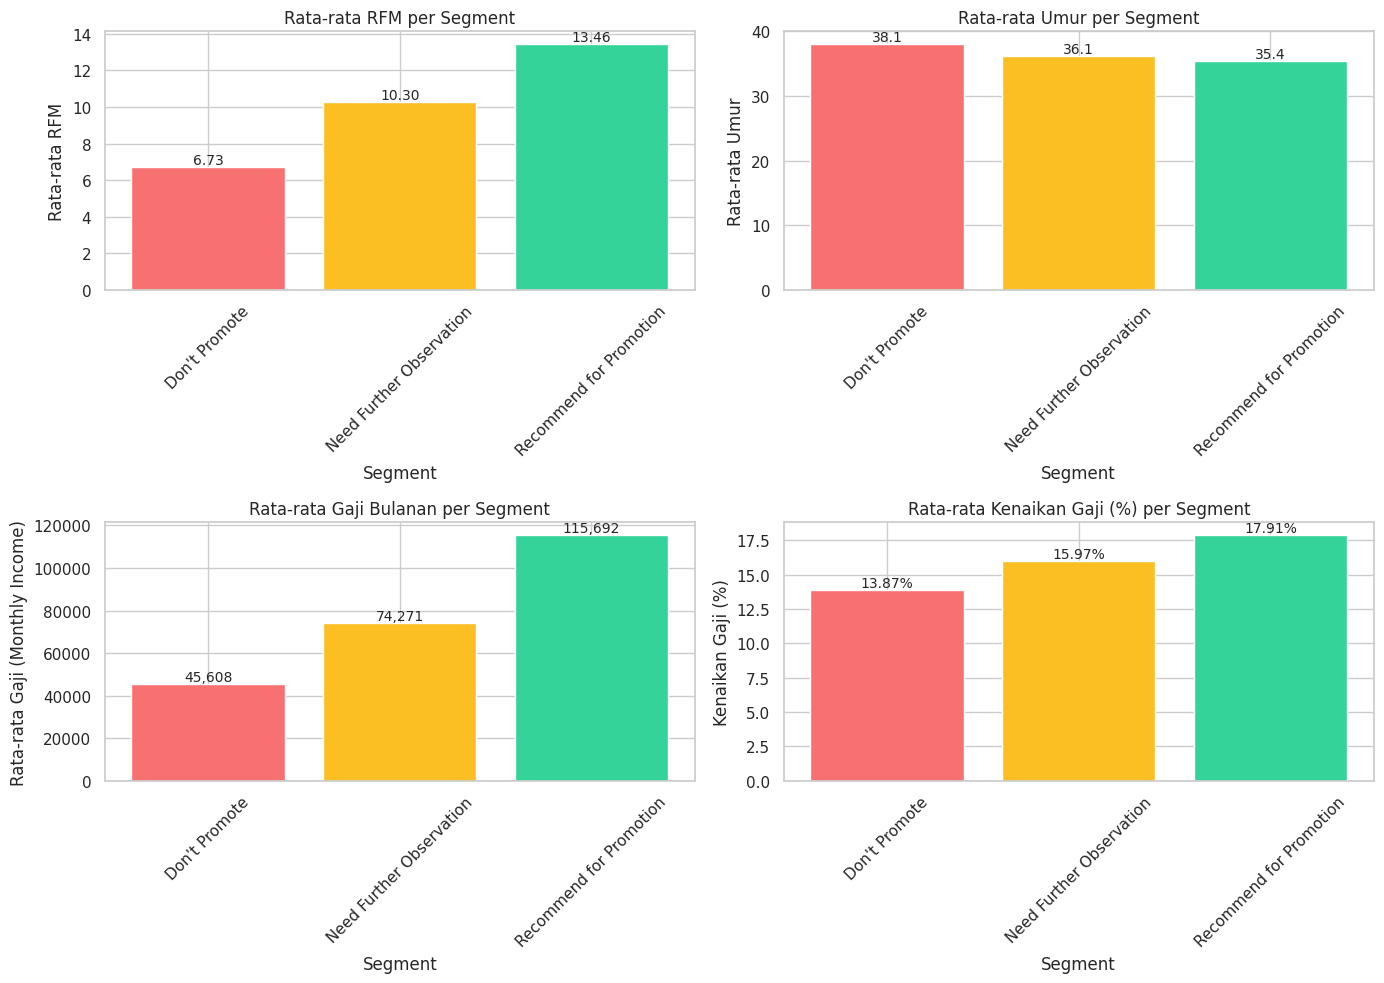

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

colors = {
    "Recommend for Promotion": "#34D399",
    "Need Further Observation": "#FBBF24",
    "Don't Promote": "#F87171"
}

# --- Chart 1: RFM_total ---
bars = axes[0,0].bar(
    segment_summary["RFM_Segment"],
    segment_summary["avg_rfm"],
    color=[colors.get(seg, "#60A5FA") for seg in segment_summary["RFM_Segment"]]
)
axes[0,0].set_title("Rata-rata RFM per Segment")
axes[0,0].set_xlabel("Segment")
axes[0,0].set_ylabel("Rata-rata RFM")
axes[0,0].tick_params(axis='x', rotation=45)

# Tambahkan label data
for bar in bars:
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2, height, f"{height:.2f}",
                   ha='center', va='bottom', fontsize=10)

# --- Chart 2: Age ---
bars = axes[0,1].bar(
    segment_summary["RFM_Segment"],
    segment_summary["avg_age"],
    color=[colors.get(seg, "#60A5FA") for seg in segment_summary["RFM_Segment"]]
)
axes[0,1].set_title("Rata-rata Umur per Segment")
axes[0,1].set_xlabel("Segment")
axes[0,1].set_ylabel("Rata-rata Umur")
axes[0,1].tick_params(axis='x', rotation=45)

for bar in bars:
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2, height, f"{height:.1f}",
                   ha='center', va='bottom', fontsize=10)

# --- Chart 3: Monthly Income ---
bars = axes[1,0].bar(
    segment_summary["RFM_Segment"],
    segment_summary["avg_salary"],
    color=[colors.get(seg, "#60A5FA") for seg in segment_summary["RFM_Segment"]]
)
axes[1,0].set_title("Rata-rata Gaji Bulanan per Segment")
axes[1,0].set_xlabel("Segment")
axes[1,0].set_ylabel("Rata-rata Gaji (Monthly Income)")
axes[1,0].tick_params(axis='x', rotation=45)

for bar in bars:
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2, height, f"{height:,.0f}",
                   ha='center', va='bottom', fontsize=10)

# --- Chart 4: Salary Hike ---
bars = axes[1,1].bar(
    segment_summary["RFM_Segment"],
    segment_summary["avg_hike"],
    color=[colors.get(seg, "#60A5FA") for seg in segment_summary["RFM_Segment"]]
)
axes[1,1].set_title("Rata-rata Kenaikan Gaji (%) per Segment")
axes[1,1].set_xlabel("Segment")
axes[1,1].set_ylabel("Kenaikan Gaji (%)")
axes[1,1].tick_params(axis='x', rotation=45)

for bar in bars:
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2, height, f"{height:.2f}%",
                   ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


/tmp/ipython-input-739808387.py:16: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


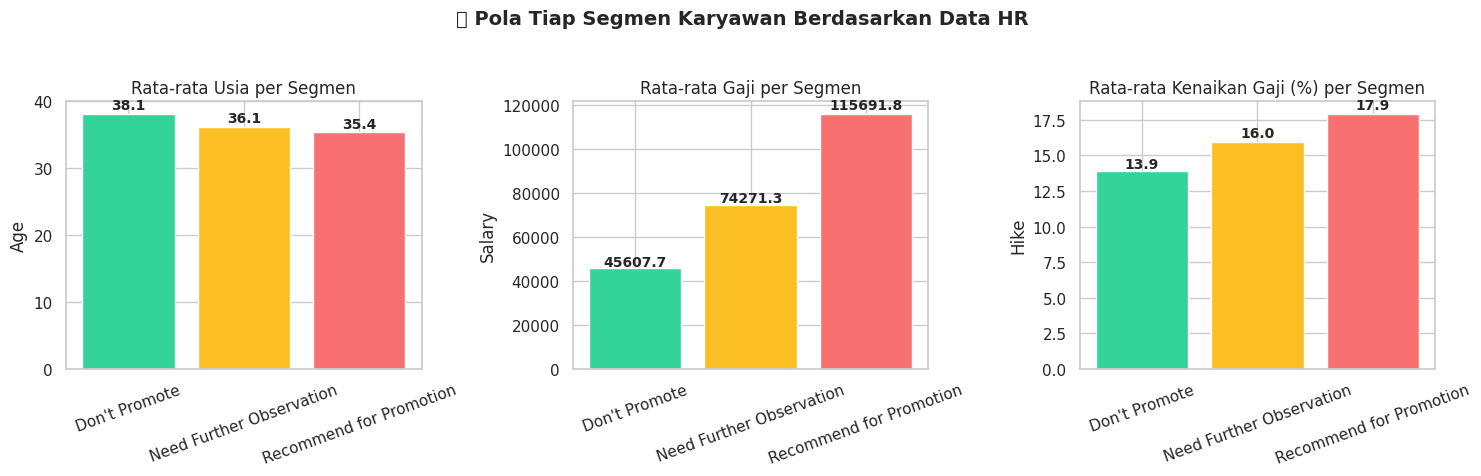

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics = ["avg_age", "avg_salary", "avg_hike"]
titles = ["Rata-rata Usia per Segmen", "Rata-rata Gaji per Segmen", "Rata-rata Kenaikan Gaji (%) per Segmen"]
colors = ["#34D399", "#FBBF24", "#F87171"]

for i, ax in enumerate(axes):
    ax.bar(segment_summary["RFM_Segment"], segment_summary[metrics[i]], color=colors)
    ax.set_title(titles[i])
    ax.set_ylabel(metrics[i].replace("avg_", "").replace("_", " ").title())
    ax.tick_params(axis="x", rotation=20)

    for idx, val in enumerate(segment_summary[metrics[i]]):
        ax.text(idx, val + (val * 0.02), f"{val:.1f}", ha='center', fontsize=10, fontweight='bold')

plt.suptitle("📊 Pola Tiap Segmen Karyawan Berdasarkan Data HR", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
bins = [18, 25, 30, 40, 50, 60]  # batas usia
labels = [
    "18–25 tahun",
    "26–30 tahun",
    "31–40 tahun",
    "41–50 tahun",
    "51–60 tahun"
]

# Tambahkan kolom rentang usia ke dataset
hr_final["Age_Band"] = pd.cut(hr_final["Age"], bins=bins, labels=labels, right=True)

# Ringkasan distribusi jumlah karyawan per kelompok usia
age_summary = hr_final["Age_Band"].value_counts().sort_index()
print("Distribusi Karyawan Berdasarkan Rentang Usia:")
print(age_summary)

Distribusi Karyawan Berdasarkan Rentang Usia:
Age_Band
18–25 tahun     345
26–30 tahun     789
31–40 tahun    1857
41–50 tahun     966
51–60 tahun     429
Name: count, dtype: int64
